# Constant Opacity (No Heat) Resolution Study
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  07/18/2024          |
| Updated |  07/19/2024          |

## [Quantities](https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport#units)

- Code Units
  - Temperature $T_0$
  - Density $\rho_0$
  - Length $L_0$
  - Time $t_0 = L_0 / v_0 = \mathbb{C}L_0 / c$
- Ideal Gas
  - Constant mean molecular weight $\mu$
  - Atomic mass constant $m_\mathrm{u}$
  - Gas velocity (isothermal sound speed) $v_0 = c_\mathrm{s,iso} = \sqrt{k_\mathrm{B} T_0 / (\mu m_\mathrm{u})}$
  - Pressure $P_0 \equiv k_\mathrm{B}\rho_0 T_0 / (\mu m_\mathrm{u}) = \rho_0 R_\mathrm{ideal} T_0$
  - Internal energy $E_\mathrm{g} = P/(\gamma_\mathrm{g} - 1)$ for adiabatic index $\gamma_\mathrm{g} \neq 1$
  - Temperature $T = P/(R_\mathrm{ideal}\rho) = E_\mathrm{g}(\gamma_\mathrm{g} - 1)/(R_\mathrm{ideal}\rho)$
- Radiation
  - Specific intensity $I\,[a_\mathrm{r}T_0^4]$
  - Energy density $E_\mathrm{r} = \int I\mathrm{d}\Omega$ (taking $4\pi = 1$)
  - Flux $\mathbf{F}_\mathrm{r} = \int\mathbf{n}I\mathrm{d}\Omega$ (units of $ca_\mathrm{r}T_0^4$)
- Dimensionless
  - $\mathbb{C} = \mathcal{C} \equiv c/v_0 = c/c_\mathrm{s,iso}$
  - $\mathbb{P} = \mathcal{P} \equiv a_\mathrm{r}T_0^4 / P_0 = a_\mathrm{r}T_0^4 / (\rho_0 R_\mathrm{ideal} T_0)$
- Sums
  - Total pressure (energy) $P_\mathrm{g} + \mathbb{P}P_\mathrm{r}\,[P_0]$
  - Total momentum $\rho v + F_\mathrm{r}\mathbb{P}/\mathbb{C}\,[\rho_0 v_0]$

In [1]:
# BEGIN /athinput.[pgen]
# <radiation>
T_unit           = 6.14e3              # T_0 [K]
density_unit     = 4.28e-14            # \rho_0 [g/cm^3]
molecular_weight = 0.6                 # \mu
# END /athinput.[pgen]

# BEGIN athena/src/nr_radiation/radiation.cpp
# NRRadiation::NRRadiation(...) {
#   // universal constants we need
#   // https://physics.info/constants/
#   // arad = 4 * sigma/c
arad = 7.565733250033928e-15
c_speed = 2.99792458e10 # // speed of light

tunit = T_unit                # pin->GetOrAddReal("radiation","T_unit",1.e7);
rhounit = density_unit        # pin->GetOrAddReal("radiation","density_unit",1.0);
mol_weight = molecular_weight # pin->GetOrAddReal("radiation","molecular_weight",0.6);

# ...
#   }  else if (user_unit_ == 1) {
#      // calculate prat and crat based on user provided unit
r_ideal = 8.314462618e7/mol_weight
prat = arad * tunit * tunit * tunit/(rhounit * r_ideal)
cs_iso = (r_ideal * tunit)**(1/2)
crat = c_speed/cs_iso
# END athena/src/nr_radiation/radiation.cpp

# Extra conversions
m_u              = 1.66e-24            # atomic mass constant [g]
k_B              = 1.38e-16            # Boltzmann constant [erg/K]
P_0 = density_unit*r_ideal*T_unit
P_0alt = k_B*density_unit*T_unit/molecular_weight/m_u
prat_check = arad*T_unit**4/P_0

print(f'prat = {prat:.2e}')
print(f'crat = {crat:.2e}')
print(rf' P_0 = \rho_0*R_ideal*T_0       = {P_0:.2e} g/cm/s^2')
print(rf' P_0 = k_B*\rho_0*T_0/(\mu*m_u) = {P_0alt:.2e} g/cm/s^2')
print(f'(prat_check = a_r*T_0^4/P_0 = {prat_check:.2e})')


prat = 2.95e+02
crat = 3.25e+04
 P_0 = \rho_0*R_ideal*T_0       = 3.64e-02 g/cm/s^2
 P_0 = k_B*\rho_0*T_0/(\mu*m_u) = 3.64e-02 g/cm/s^2
(prat_check = a_r*T_0^4/P_0 = 2.95e+02)


From Jiang ([2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract), under eq. 10),
$$
  T = \frac{P}{R_\mathrm{ideal}\rho},
$$
where $R_\mathrm{ideal} = R/\mu$.
$R$ is the gas constant, and the [mean molecular weight](http://astronomy.nmsu.edu/jasonj/565/docs/09_03.pdf) $\mu = \overline{m}/m_\mathrm{u}$, where $\overline{m}$ is the mean mass per particle and the [atomic mass constant](https://en.wikipedia.org/wiki/Dalton_(unit)) $m_\mathrm{u} \approx m_\mathrm{p}$, the proton mass.

## Stellar Properties

The luminosity $L = FA$, where $F$ is the flux and $A$ is the emission surface area.
For an emitting sphere with radius $R$, and $F = ca_\mathrm{r}T^4/4$ (Rybicki & Lightman 1979, eq. 1.43), where $ca_\mathrm{r}/4 = \sigma$ the Stefan–Boltzmann constant $\left[\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{cm}^{-2}\,\mathrm{K}^{-4}\right]$

\begin{align}
  L &= \frac{ca_\mathrm{r}}{4} T^4(4\pi R^2) \\
    &= \pi ca_\mathrm{r} T^4R^2
\end{align}

In [2]:
#===============================================================================
import numpy as np

# BEGIN athinput.[pgen]
# <radiation>
length_unit      = 5.98e14             # L_0 [cm]

# <problem>
R                = 1.16e-4             # solar radius [L_0]
T                = 9.42e-1             # solar temperature [T_0]
# END athinput.[pgen]

# Solar constants, astrophysical units and conversions
Lsun             = 3.83e33             # solar luminosity [erg/s]
Rsun             = 6.95700e10          # solar radius [cm]
au               = 1.495978707e13      # astronomical unit [cm]
L_au             = length_unit/au      # [au]

# Compute stellar flux and luminosity
Flux = lambda r : np.power(T, 4)*np.power(R/r, 2)/4 # stellar flux at r [c*a_r*T_0^4]
A = 4*np.pi*(R*length_unit)**2                      # surface area [cm^2]
L = Flux(R)*c_speed*arad*T_unit**4*A                      # luminosity [erg/s]

print(f'       R = {R*length_unit/Rsun:.2f} Rsun')
print(f'       T = {T*T_unit:.0f} K')
print(f'       L = {L/Lsun:.2f} Lsun')
print(f'F( 1 au) = {Flux(1/L_au):.2e} ca_rT_0^4'\
      + f' = {Flux(1/L_au)*c_speed*arad*T_unit**4:.2e} erg/cm^2/s'\
      + f' = {Flux(1/L_au)*c_speed*arad*T_unit**4/1e3:.0f} W/m^2 (solar constant)')
print(f'F(10 au) = {Flux(10/L_au):.2e} ca_rT_0^4'\
      + f' = {Flux(10/L_au)*c_speed*arad*T_unit**4:.2e} erg/cm^2/s'\
      + f' = {Flux(10/L_au)*c_speed*arad*T_unit**4/1e3:.1f} W/m^2')
# Flux at Saturn (~10 au) https://astronomy.stackexchange.com/a/25242/33232

       R = 1.00 Rsun
       T = 5784 K
       L = 1.00 Lsun
F( 1 au) = 4.23e-06 ca_rT_0^4 = 1.36e+06 erg/cm^2/s = 1364 W/m^2 (solar constant)
F(10 au) = 4.23e-08 ca_rT_0^4 = 1.36e+04 erg/cm^2/s = 13.6 W/m^2


## Theoretical Model

See [Desmos](https://www.desmos.com/) for interactive plots of 
- [$T = P/\rho$](https://www.desmos.com/calculator/ptyevuziu7)
- [$\rho_\mathrm{mid}$](https://www.desmos.com/calculator/ubtsqj1ltb)
- [$\rho(\theta)$](https://www.desmos.com/calculator/marlugmhhr)

In code units,
\begin{align*}
  T(r, \theta) &= \frac{P(r, \theta)}{\rho} = \frac{P_0}{\rho_0}\left(\frac{r\sin\theta}{r_0}\right)^{-1/2} \\
  \rho_\mathrm{mid}(r) &= \frac{\rho_0\left(\frac{r + r_0}{r_0}\right)^{-9/4}}{1 + \exp\left[-\mathrm{e}^\mathrm{e}\left(\frac{r - r_0}{r_0}\right)\right]} \\
  \rho(r, \theta) &= \rho_\mathrm{mid}\exp\left[\frac{GMr}{P}\left(\frac{1}{\sqrt{r^2\sin^2\theta + r^2\cos^2\theta}} - \frac{1}{r\sin\theta}\right)\right] \\
                  &= \rho_\mathrm{mid}\exp\left[\frac{GM}{P}\left(1 - \frac{1}{\sin\theta}\right)\right] \\
\end{align*}

Let $u_\mathrm{init}$ be the initial specific internal energy of the gas.
From the [classical ideal gas law](https://en.wikipedia.org/wiki/Equation_of_state#Classical_ideal_gas_law), in code units,

\begin{align*}
  T_\mathrm{init} &=  (\gamma - 1)u_\mathrm{init} \\
  u_\mathrm{init} &= \frac{P}{\rho(\gamma - 1)}
\end{align*}

h/r (r = L_0) = 0.06 (cf. original h/r_0 = 0.07)

/athinput.[pgen]
<problem>
...
kappa_a = 558.98169599999994  # absorption opacity [\rho_0*L_0]
kappa_a = 21.84 cm^2/g


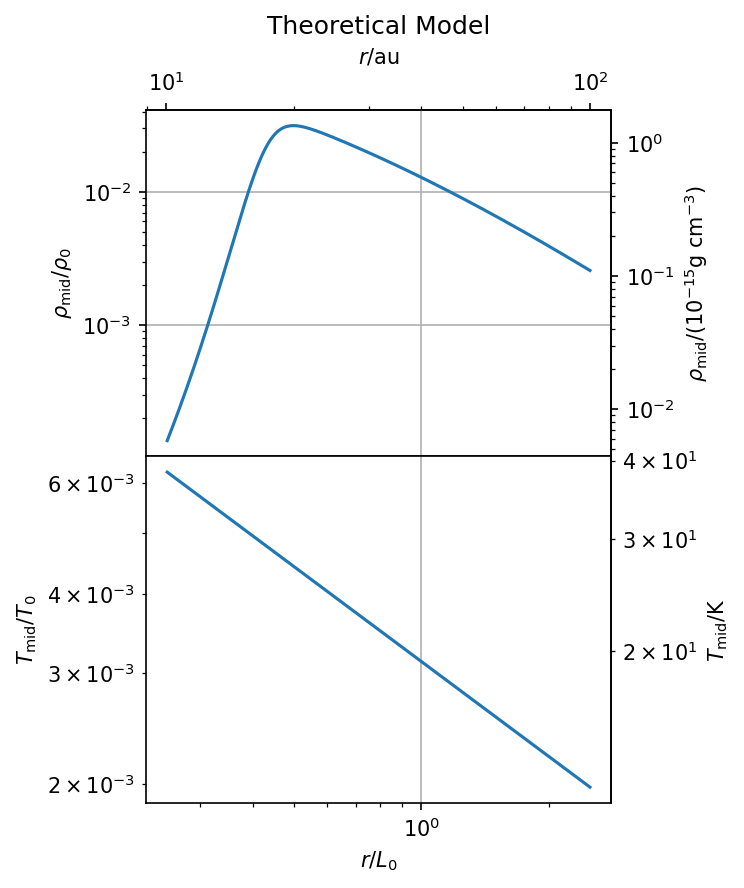

In [3]:
#===============================================================================
import numpy as np
import matplotlib.pyplot as plt

# BEGIN [pgen].cpp
# void Mesh::InitUserMeshData(ParameterInput *pin) {
# // Get parameters for gravitatonal potential of central point mass
gm0 = 1.0 # pin->GetOrAddReal("problem","GM",0.0);

# //---------------------------------------------------------------------------
# //! transform to cylindrical coordinate

def GetCylCoord(x1, x2, x3):
  rad = np.abs(x1*np.sin(x2))
  phi = x3
  z = x1*np.cos(x2)
  return rad, phi, z

# //---------------------------------------------------------------------------
# //! computes density in cylindrical coordinates

def DenProfileCyl(rad, phi, z):
  p_over_r = PoverR(rad, phi, z)
  denmid = rho0*np.power((rad + r0)/r0, dslope)\
           /(1 + np.exp(-np.exp(np.e)*(rad - r0)/r0))
  dentem = denmid*np.exp(gm0/p_over_r*(1./np.sqrt(rad**2 + z**2) - 1./rad))
  den = dentem
  return den

# //---------------------------------------------------------------------------
# //! computes pressure/density in cylindrical coordinates

def PoverR(rad, phi, z):
  poverr = p0_over_r0*np.power(rad/r0, pslope)
  return poverr
# END [pgen].cpp

# extra quantities
kappa_star_cgs    = 10                 # [cm^2/g]
dgratio           = 100                # dust-to-gas ratio
small_grain_ratio = 0.02184

# begin athinput.[pgen]
# <mesh>
nx1              = 1024                # Number of zones in X1-direction
x1min            = 0.250163663377926   # minimum value of X1
x1max            = 2.501636633779264   # maximum value of X1

nx2              = 128                 # Number of zones in X2-direction
x2min            = 0                   # minimum value of X2
x2max            = 3.141592653589793   # maximum value of X2

# <hydro>
dfloor           = 1e-12               # minimum density

# <problem>
r0               = 0.425278227742474   # disk radial normalization [L_0]
rho0             = 0.2                 # disk density normalization [\rho_0]
p0_over_r0       = 4.80e-03            # (H/r0)^2
pslope           = -0.5                # pressure power-law index
dslope           = -2.25               # density power-law index
kappa_a          = 558.98169599999994  # absorption opacity [\rho_0*L_0]
# end athinput.[pgen]

# Compute dust opacity in code units
kappa_star = kappa_star_cgs*dgratio*small_grain_ratio*density_unit*length_unit
print(f'h/r (r = L_0) = {(PoverR(1, np.pi/2, 0))**0.5:.2f}'\
      + f' (cf. original h/r_0 = {p0_over_r0**0.5:.2f})\n')
print('/athinput.[pgen]\n<problem>\n...')
print(rf'kappa_a = {kappa_a:.14f}  # absorption opacity [\rho_0*L_0]')
print(rf'kappa_a = {kappa_a/density_unit/length_unit:.2f} cm^2/g')

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Generate fields
x1f, x2f = np.linspace(x1min, x1max, nx1+1), np.linspace(x2min, x2max, nx2+1)
x1v, x2v = (x1f[:-1] + x1f[1:])/2, (x2f[:-1] + x2f[1:])/2
x1mesh, x2mesh = np.meshgrid(x1v, x2v)
rads, phis, zs = GetCylCoord(x1mesh, x2mesh, 0)
rho_field_theo = DenProfileCyl(rads, phis, zs)
rho_field_theo[rho_field_theo < dfloor] = dfloor
T_field_theo = PoverR(rads, phis, zs)
dtheta_theo = (x2max - x2min)/nx2
theta_mid_deg = 90
j_mid = int(theta_mid_deg/rad2deg/dtheta_theo)

# Plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(4, 6), dpi=150)
axs[0].plot(x1v, rho_field_theo[j_mid, :])
axs[1].plot(x1v, T_field_theo[j_mid, :])

# Format secondary axes in cgs
def r2au(r):
  return r*L_au

def rho2cgs(rho):
  return rho*density_unit/1e-15

def T2cgs(T):
  return T*T_unit

ax_r = axs[0].secondary_xaxis('top', functions=(r2au, r2au))
ax_rho = axs[0].secondary_yaxis('right', functions=(rho2cgs, rho2cgs))
ax_T = axs[1].secondary_yaxis('right', functions=(T2cgs, T2cgs))

ax_r.set(xlabel=r'$r$/au')
ax_r.minorticks_on()
ax_rho.set(ylabel=r'$\rho_\mathrm{mid}$/($10^{-15}$g cm$^{-3}$)')
ax_rho.minorticks_on()
ax_T.set(ylabel=r'$T_\mathrm{mid}$/K')
ax_T.minorticks_on()

# Format subplots
for ax in axs:
  ax.set(xscale='log', yscale='log')
  ax.grid()
  ax.minorticks_on()

axs[0].set(title='Theoretical Model', ylabel=r'$\rho_\mathrm{mid}/\rho_0$')
axs[1].set(xlabel=r'$r/L_0$',
           ylabel=r'$T_\mathrm{mid}/T_0$')
plt.subplots_adjust(hspace=0.0)
# plt.savefig('figs/frame.jpg', bbox_inches='tight')

### Optical Depth, Specific Intensity, Radial Flux

From Rybicki & Lightman (1979), we define the *optical depth* along a ray in the radial direction $r$ at polar angle $\theta$ as
\begin{align*}
  \mathrm{d}\tau &\equiv \alpha\mathrm{d}r \\
  \tau(r, \theta) &= \int_{r_0}^r \alpha(r', \theta)\mathrm{d}r', \tag{1.26}
\end{align*}
where we define the *absorption coefficient* $[\mathsf{L}^{-1}]$ as
$$
\alpha(r, \theta) \equiv \rho\kappa_\mathrm{a},
\tag{1.22}
$$
for mass density $\rho(r, \theta)$ and *opacity* coefficient $\kappa_\mathrm{a}$ $[\mathsf{L}^2\mathsf{M}^{-1}]$.
With these, we can express the radiative transfer equation (1.23)—for absorption only—in terms of the optical depth as
$$
  \frac{\mathrm{d}I}{\mathrm{d}\tau} = -I
$$
with the solution
$$
  I(\tau) = I(0)e^{-\tau}.
$$
For *blackbody radiation* from a surface of uniform brightness $B$ at temperature $T$ (Rybicki & Lightman 1979, eq. 1.42)
$$
  I(0) = B(T) = \frac{a_\mathrm{r}c}{4\pi}T^4.
$$
The flux $F$ at a radial distance $r$ from a sphere of uniform brightness $B$ and with radius $R$ is (cf. Rybicki & lightman 1979, eq. 1.13)
\begin{align*}
  F &= \pi B\left(\frac{R}{r}\right)^2e^{-\tau} \\
    &= \frac{ca_\mathrm{r}T^4}{4}\left(\frac{R}{r}\right)^2e^{-\tau}.
\end{align*}

F(10 au) = 4.20e-08 ca_rT_0^4 = 1.35e+04 erg/cm^2/s


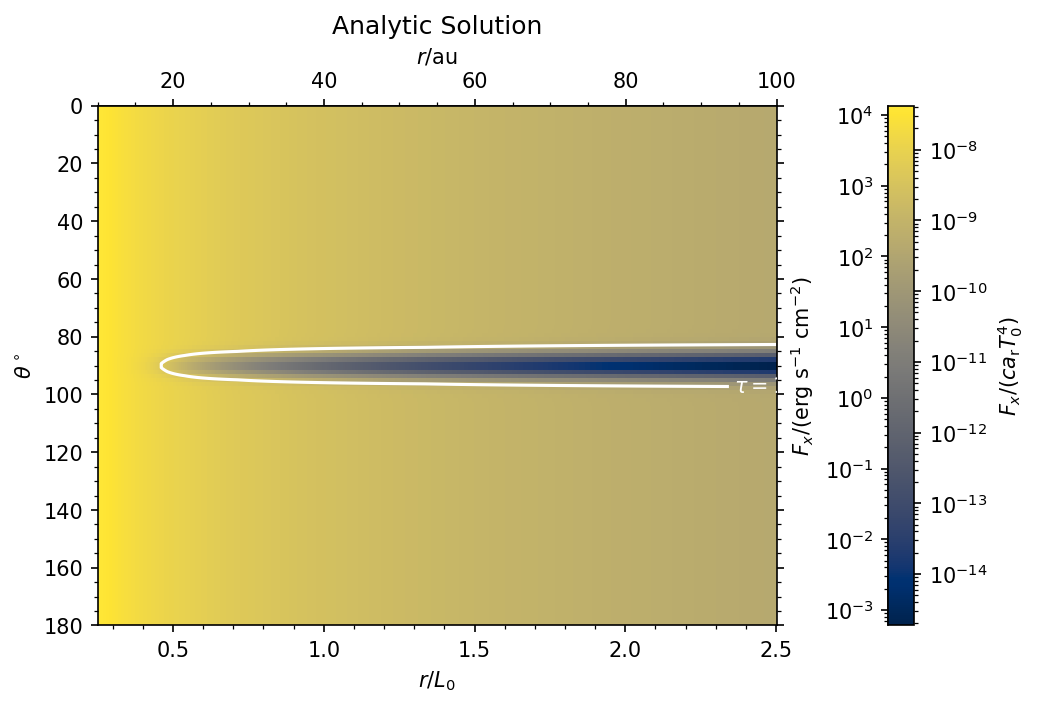

In [4]:
#===============================================================================
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt

def fmt(x):
  return rf'$\tau={x:.0f}$'

dtau = rho_field_theo*kappa_a*np.diff(x1f)
# dtau = rho_field_theo*kappa_a*((x1f[1:]**3 - x1f[:-1]**3)/3)\
#        /(((x1f[1:]**2 + x1f[:-1]**2)/2))
tau_field_theo = np.cumsum(dtau, axis=1)
Fx_field_theo = np.power(T, 4)*np.power(R/x1v, 2)/4*(np.exp(-tau_field_theo))

# Plot and format
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)
im = ax.pcolormesh(x1v, x2v*rad2deg, Fx_field_theo, cmap='cividis',
                   norm=colors.LogNorm())

# Format secondary (colorbar) scales in cgs
def F2cgs(F):
  return F*c_speed*arad*T_unit**4 # arad = 4 * sigma/c

ax_r = ax.secondary_xaxis('top', functions=(r2au, r2au))
cbar_F = plt.colorbar(im, label='$F_x/(ca_\mathrm{r}T_0^4)$', pad=0.12)
cbar_F_cgs = cbar_F.ax.secondary_yaxis('left', functions=(F2cgs, F2cgs))
ax_r.minorticks_on()
ax_r.set(xlabel=r'$r$/au')
cbar_F_cgs.set(ylabel=r'$F_x$/(erg s$^{-1}$ cm$^{-2}$)')

# Sanity check
print(f'F(10 au) = {Fx_field_theo[0][0]:.2e} ca_rT_0^4 = '\
      + f'{F2cgs(Fx_field_theo[0][0]):.2e} erg/cm^2/s')

# Format subplots
CS = ax.contour(x1v, x2v*rad2deg, tau_field_theo, [1, 1e4],
                colors=['white', 'white'])
ax.clabel(CS, CS.levels, fmt=fmt)
ax.invert_yaxis()
ax.minorticks_on()
ax.set(title='Analytic Solution', xlabel='$r/L_0$', ylabel=r'$\theta^\circ$')
ax.tick_params(axis='y', which='both', right=True)

## Radial resolution study

[Text(0.5, 0, '$t/t_0$'),
 Text(0, 0.5, '$E_\\mathrm{r,tot}/(a_\\mathrm{r}T_0^4)$'),
 None,
 None,
 Text(0.5, 1.0, '$\\kappa_\\mathrm{const}^\\mathrm{abs}=21.84$ cm$^2$ g$^{-1}$')]

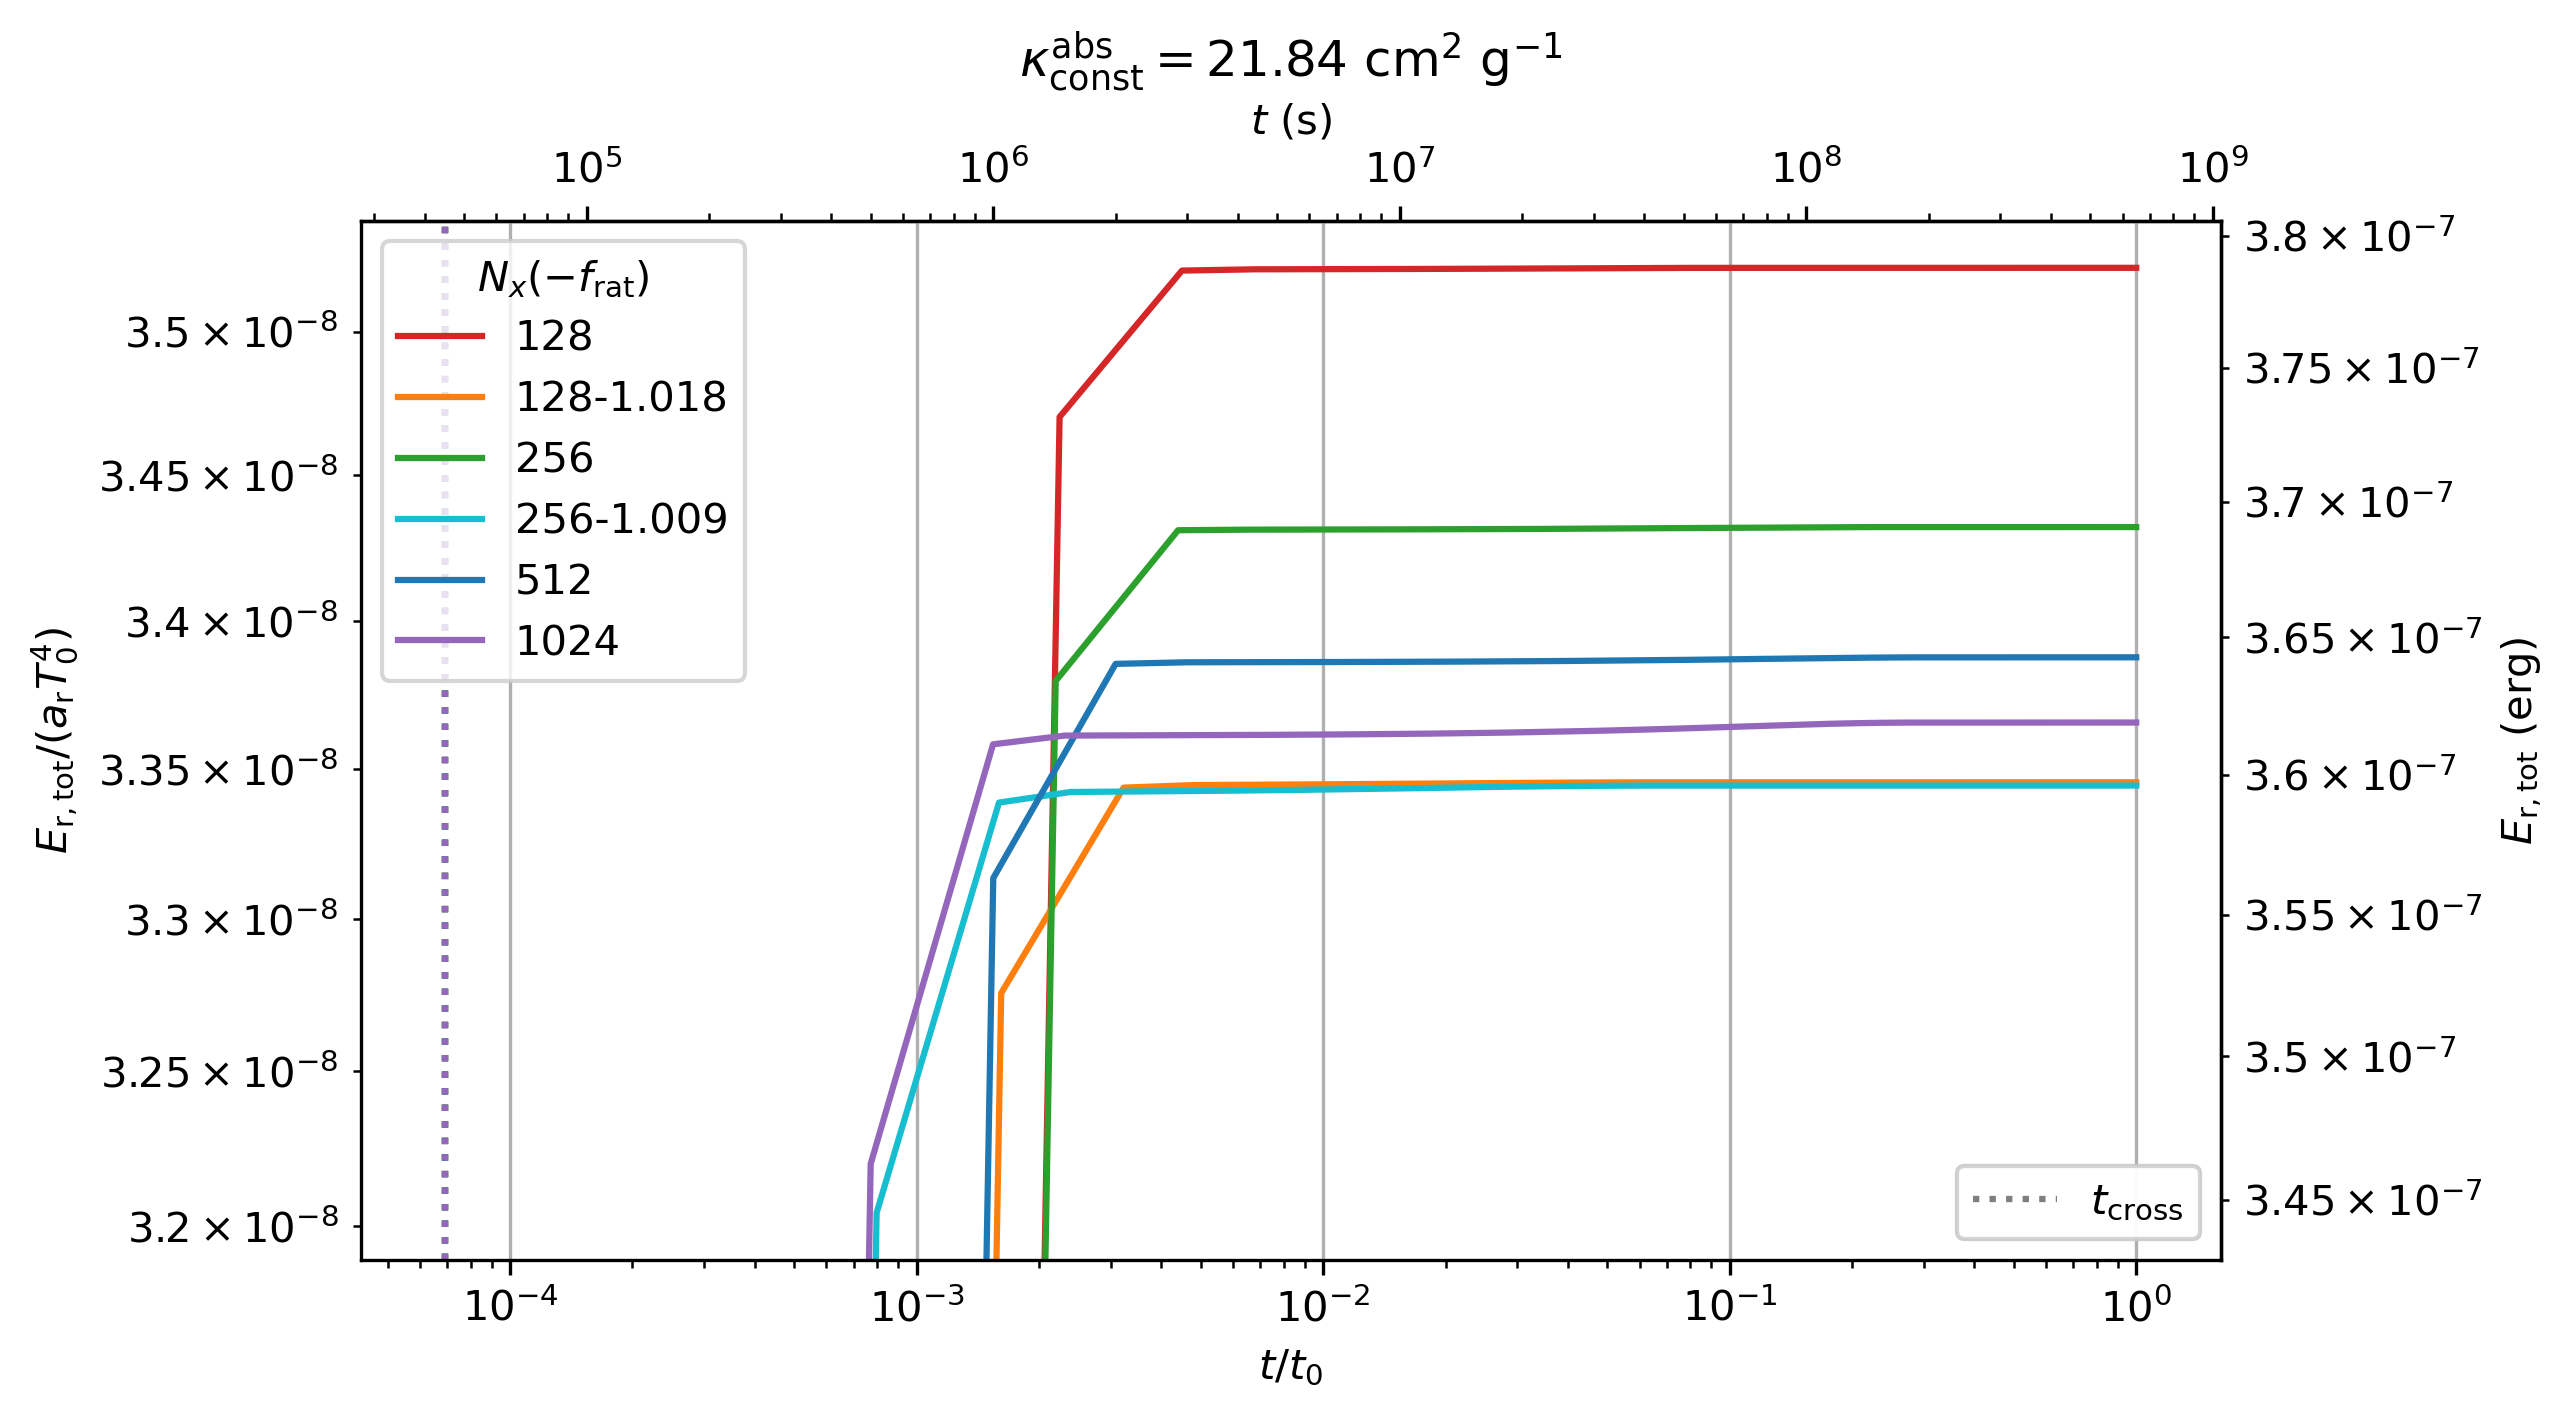

In [17]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

fig, ax = plt.subplots(figsize=(8, 4.5), dpi=300)
tab_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:cyan', 'tab:blue',
              'tab:purple', 'tab:olive', 'tab:pink', 'tab:brown', 'tab:gray']
lss = ['dashdot', 'dashed', 'dotted', (0, (1, 5))]
c_solns, ref_soln = [], []
crat = None
theta = None

# Read and plot
problem_id = 'const_opac'
base = 'nx1'
runs = ['128', '128-1.018', '256', '256-1.009', '512', '1024']
for i, run in enumerate(runs):
    path = f'{base}/{run}'
    athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
    length_unit = athinput['radiation']['length_unit']
    molecular_weight = athinput['radiation']['molecular_weight']
    arad = 7.565733250033928e-15
    r_ideal = 8.314462618e7/molecular_weight
    T_unit = athinput['radiation']['T_unit']
    cs_iso = (r_ideal*T_unit)**0.5
    Vmax = 4/3*np.pi*athinput['mesh']['x1max']**3
    Vmin = 4/3*np.pi*athinput['mesh']['x1min']**3
    Vtot = (Vmax - Vmin)/2
    gamma = athinput['hydro']['gamma'] # C_p/C_v = 1 + 2/DoF
    hst = athena_read.hst(f'{path}/output/{problem_id}.hst')
    T_tot = hst['tot-E']*(gamma - 1)*Vtot/hst['mass']

    Er = hst['Er']
    if 'n_frequency' in athinput['radiation']:
        N_f = athinput['radiation']['n_frequency']
        if N_f == 16:
            Er = Er[:19232]
        Er = Er.reshape(-1, N_f)
        Er = Er.sum(axis=1)
    c_solns.append(ax.plot(hst['time'], Er, tab_colors[i], label=f'{run}')[0])

    # Compute light crossing time for oblique beams
    Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
    with open(f'{path}/output/Rad_angles.txt') as Rad_angles:
        lines = Rad_angles.read().splitlines()
        crat = float(lines[2].split()[1])
        mu = lines[-2]
        mu_x, mu_y = float(mu.split()[1]), float(mu.split()[2])
        theta = np.arctan(mu_y/mu_x)
        
    t_cross = Lx/np.cos(theta)/crat

    ax.axvline(t_cross, color=tab_colors[i], ls=':')

# Plot ghost point(s) for colorless linestyles
ref_soln.append(ax.plot([], [], 'tab:gray', ls=':',
                label=r'$t_\mathrm{cross}$')[0])
color_legend = plt.legend(title=r'$N_x(-f_\mathrm{rat})$', handles=c_solns, loc='upper left')
soln_legend = plt.legend(handles=ref_soln, loc='lower right')
ax.add_artist(color_legend)
ax.add_artist(soln_legend)


# Format secondary axes in cgs
def t2s(t):
    return t*length_unit/cs_iso

def E2erg(E):
    return E*arad*T_unit**4

def T2cgs(T):
  return T*T_unit

ax_r = ax.secondary_xaxis('top', functions=(t2s, t2s))
ax_E = ax.secondary_yaxis('right', functions=(E2erg, E2erg))

ax_r.set(xlabel=r'$t$ (s)')
ax_E.set(ylabel=r'$E_\mathrm{r,tot}$ (erg)')

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xlabel='$t/t_0$', ylabel=r'$E_\mathrm{r,tot}/(a_\mathrm{r}T_0^4)$',
       xscale='log', yscale='log',
       title=r'$\kappa_\mathrm{const}^\mathrm{abs}=21.84$ cm$^2$ g$^{-1}$')
# plt.savefig('filename.pdf', bbox_inches='tight', pad_inches=0.01)

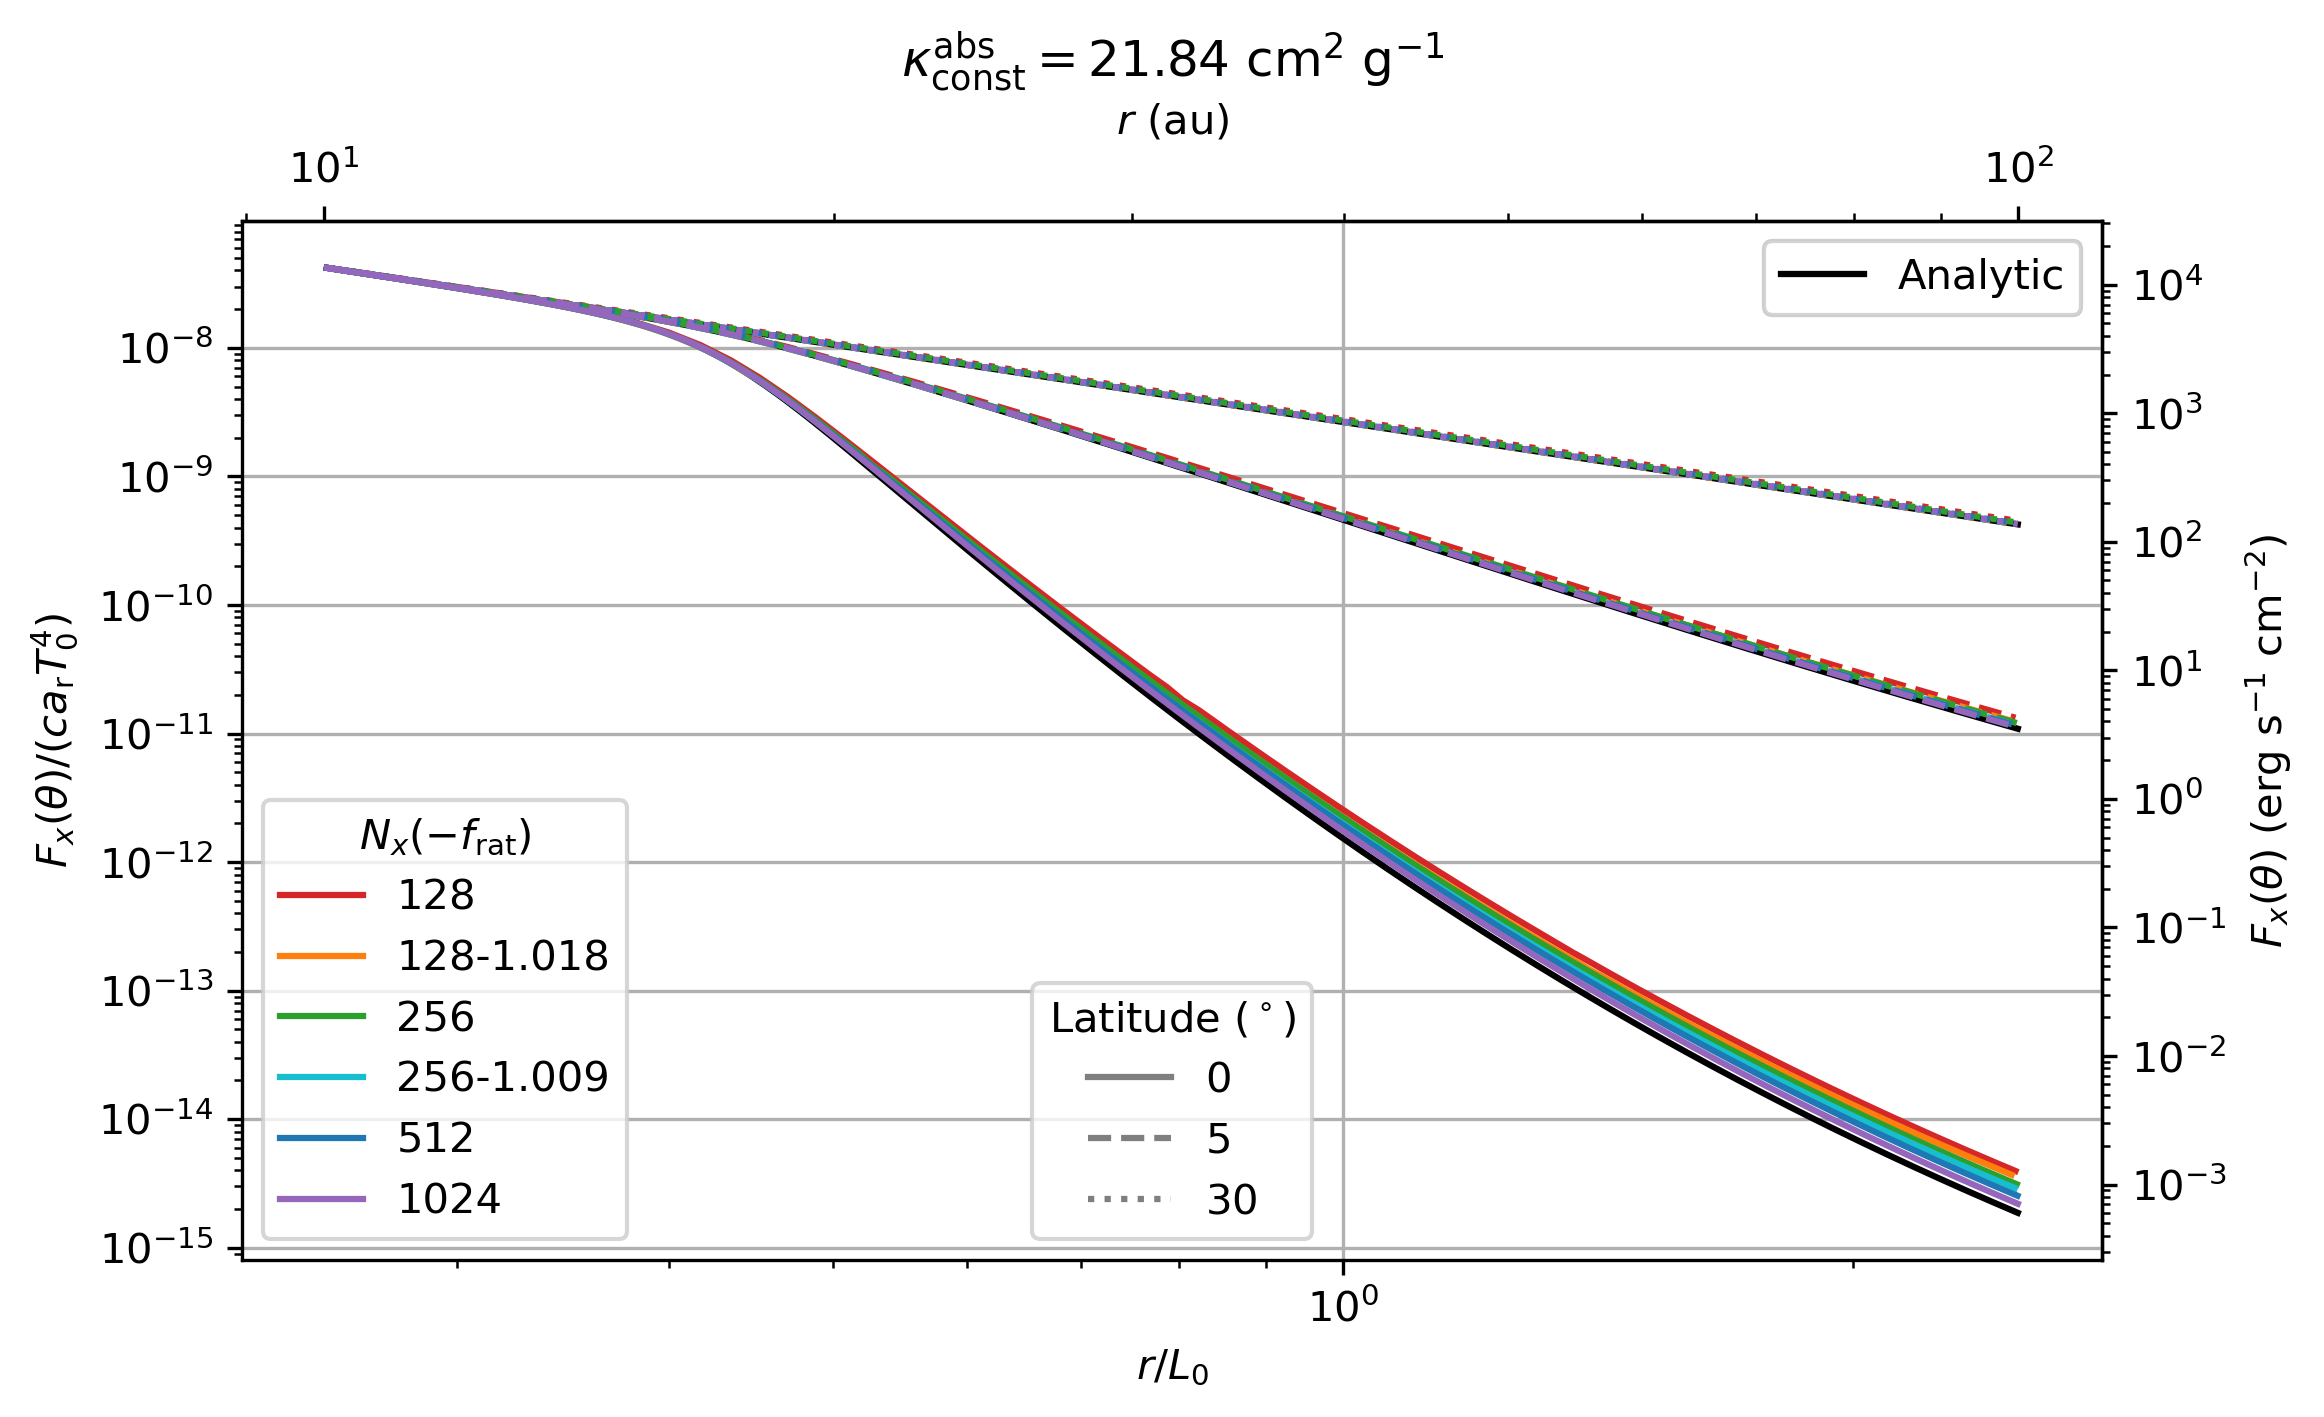

In [18]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Prepare plots
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=300)
tab_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:cyan', 'tab:blue',
              'tab:purple', 'tab:olive', 'tab:pink', 'tab:brown', 'tab:gray']
lss = ['solid', 'dashed', 'dotted']
theta_degs = [90, 85, 60]
c_solns, ls_thetas, ref_soln = [], [], []

# Analytic solution
dtheta = (x2max - x2min)/nx2
ref_soln.append(ax.plot([], [], color='black', label='Analytic')[0])
for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    ax.plot(x1v, Fx_field_theo[j, :], color='black')
    ls_thetas.append(ax.plot([], [], color='tab:gray', ls=lss[th],
                     label=rf'${90-theta_deg}$')[0])

# Athena++
problem_id = 'const_opac'
base = 'nx1'
runs = ['128', '128-1.018', '256', '256-1.009', '512', '1024']
for i, run in enumerate(runs):
  path = f'{base}/{run}'
  athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
  dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
           /athinput['mesh']['nx2']
  athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
  Fx_field = np.zeros_like(athdf['rho'][0])
  try:
    N_f = athinput['radiation']['n_frequency']
    for f in range(N_f):
      Fx_field += athdf[f'Fr_{f}_1'][0]
  except KeyError:
    Fx_field = athdf['Fr1'][0]
  for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    ax.plot(athdf['x1v'], Fx_field[j, :], color=tab_colors[i], ls=lss[th])
  c_solns.append(ax.plot([], [], color=tab_colors[i], label=run)[0])

# Plot ghost points for colorless line style and add legends
ls_legend = plt.legend(title=r'Latitude ($^\circ)$', handles=ls_thetas,
                       loc='lower center')
color_legend = plt.legend(title=r'$N_x(-f_\mathrm{rat})$', handles=c_solns,
                          loc='lower left')
soln_legend = plt.legend(handles=ref_soln, loc='upper right')
ax.add_artist(ls_legend)
ax.add_artist(color_legend)
ax.add_artist(soln_legend)

# Format secondary axes in cgs
ax_r = ax.secondary_xaxis('top', functions=(r2au, r2au))
ax_F = ax.secondary_yaxis('right', functions=(F2cgs, F2cgs))
ax_r.minorticks_on()
ax_F.minorticks_on()
ax_r.set(xlabel=r'$r$ (au)')
ax_F.set(ylabel=r'$F_x(\theta)$ (erg s$^{-1}$ cm$^{-2}$)')

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xscale='log', yscale='log', xlabel=r'$r/L_0$',
       ylabel=r'$F_x(\theta)/(ca_\mathrm{r}T_0^4)$',
       title=r'$\kappa_\mathrm{const}^\mathrm{abs}=21.84$ cm$^2$ g$^{-1}$')
ax.tick_params(axis='both', which='both')
# plt.savefig('filename.pdf', bbox_inches='tight', pad_inches=0.01)

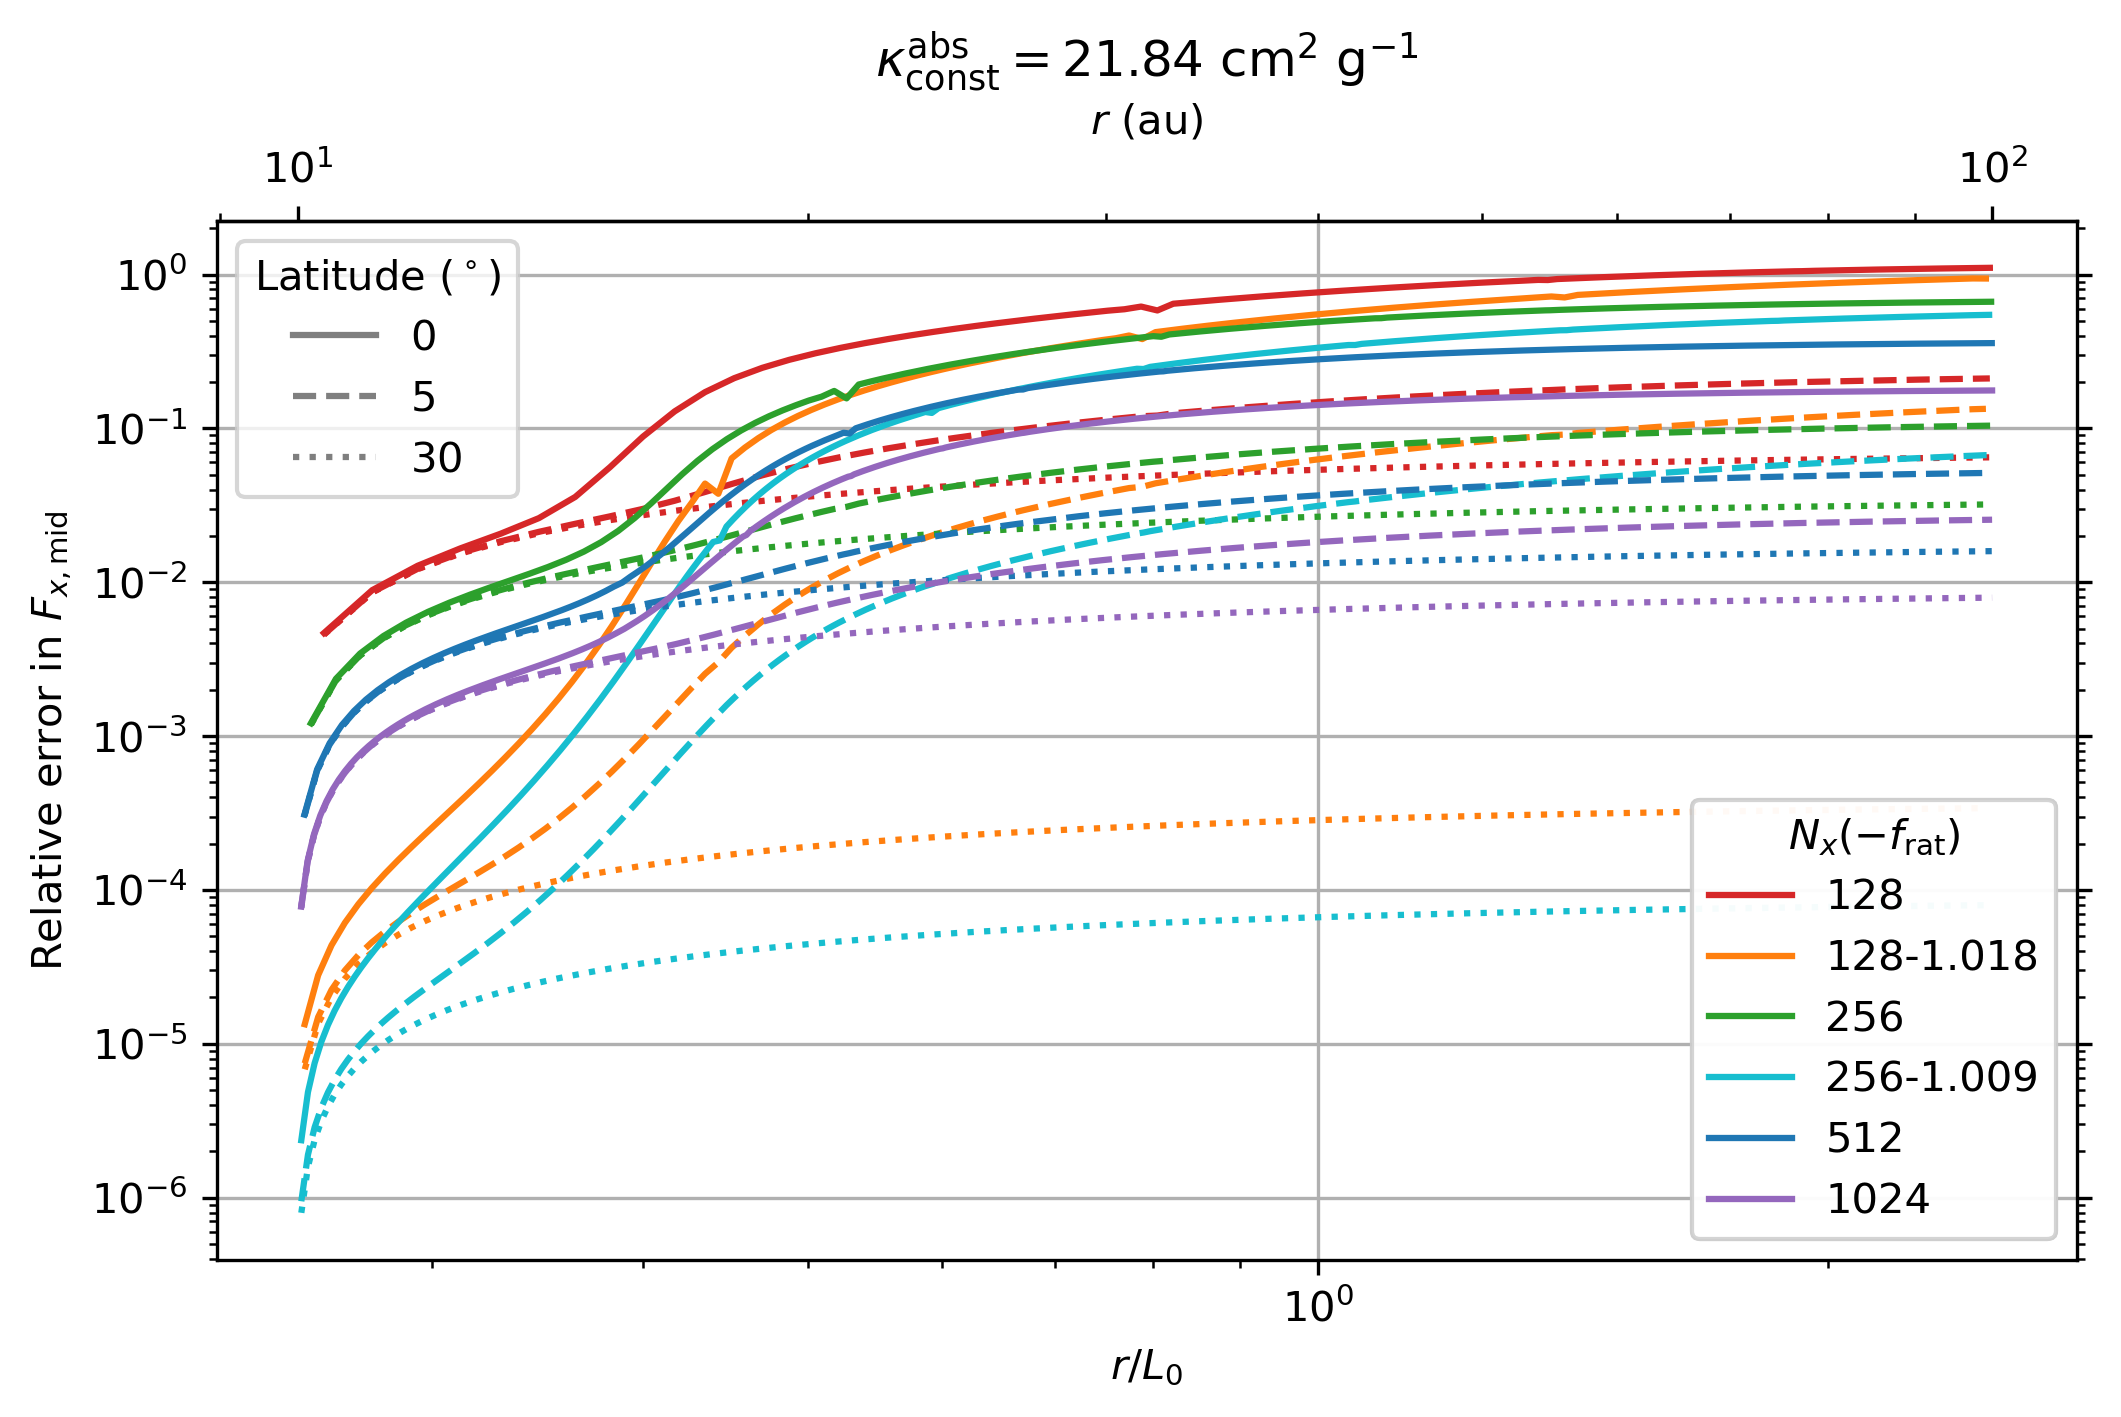

In [22]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Prepare plots
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=300)
tab_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:cyan', 'tab:blue',
              'tab:purple', 'tab:olive', 'tab:pink', 'tab:brown', 'tab:gray']
lss = ['solid', 'dashed', 'dotted']
theta_degs = [90, 85, 60]
c_solns, ls_thetas, ref_soln = [], [], []

# Compute and plot
problem_id = 'const_opac'
base = 'nx1'
runs = ['128', '128-1.018', '256', '256-1.009', '512', '1024']
for i, run in enumerate(runs):
  path = f'{base}/{run}'
  athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
  dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
           /athinput['mesh']['nx2']
  athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
  dtau = dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
  tau = np.cumsum(dtau, axis=1)
  Fx_theo = np.power(T, 4)*np.power(R/athdf['x1v'], 2)/4*(np.exp(-tau))
  Fx = np.zeros_like(Fx_theo)
  try:
    N_f = athinput['radiation']['n_frequency']
    for f in range(N_f):
      Fx += athdf[f'Fr_{f}_1'][0]
  except KeyError:
    Fx = athdf['Fr1'][0]
  c_solns.append(ax.plot([], [], tab_colors[i], label=f'{run}')[0])
  for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    rel_err = np.abs((Fx_theo[j, :] - Fx[j, :])/Fx_theo[j, :])
    ax.plot(athdf['x1v'], rel_err, color=tab_colors[i], ls=lss[th])
    if i == 0:
      ls_thetas.append(ax.plot([], [], color='tab:gray', ls=lss[th],
                     label=rf'${90-theta_deg}$')[0])

# Plot ghost points for colorless line style and add legends
ls_legend = plt.legend(title=r'Latitude ($^\circ)$', handles=ls_thetas,
                       loc='upper left')
color_legend = plt.legend(title=r'$N_x(-f_\mathrm{rat})$', handles=c_solns,
                          loc='lower right')
# soln_legend = plt.legend(handles=ref_soln, loc='lower center')
ax.add_artist(ls_legend)
ax.add_artist(color_legend)
# ax.add_artist(soln_legend)

# Format secondary axes in cgs
ax_r = ax.secondary_xaxis('top', functions=(r2au, r2au))
ax_r.minorticks_on()
ax_r.set(xlabel=r'$r$ (au)')

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xlabel=r'$r/L_0$', xscale='log', yscale='log',
       ylabel=r'Relative error in $F_{x, \mathrm{mid}}$',
       title=r'$\kappa_\mathrm{const}^\mathrm{abs}=21.84$ cm$^2$ g$^{-1}$')
ax.tick_params(axis='both', which='both', right=True)
# plt.savefig('filename.pdf', bbox_inches='tight', pad_inches=0.01)

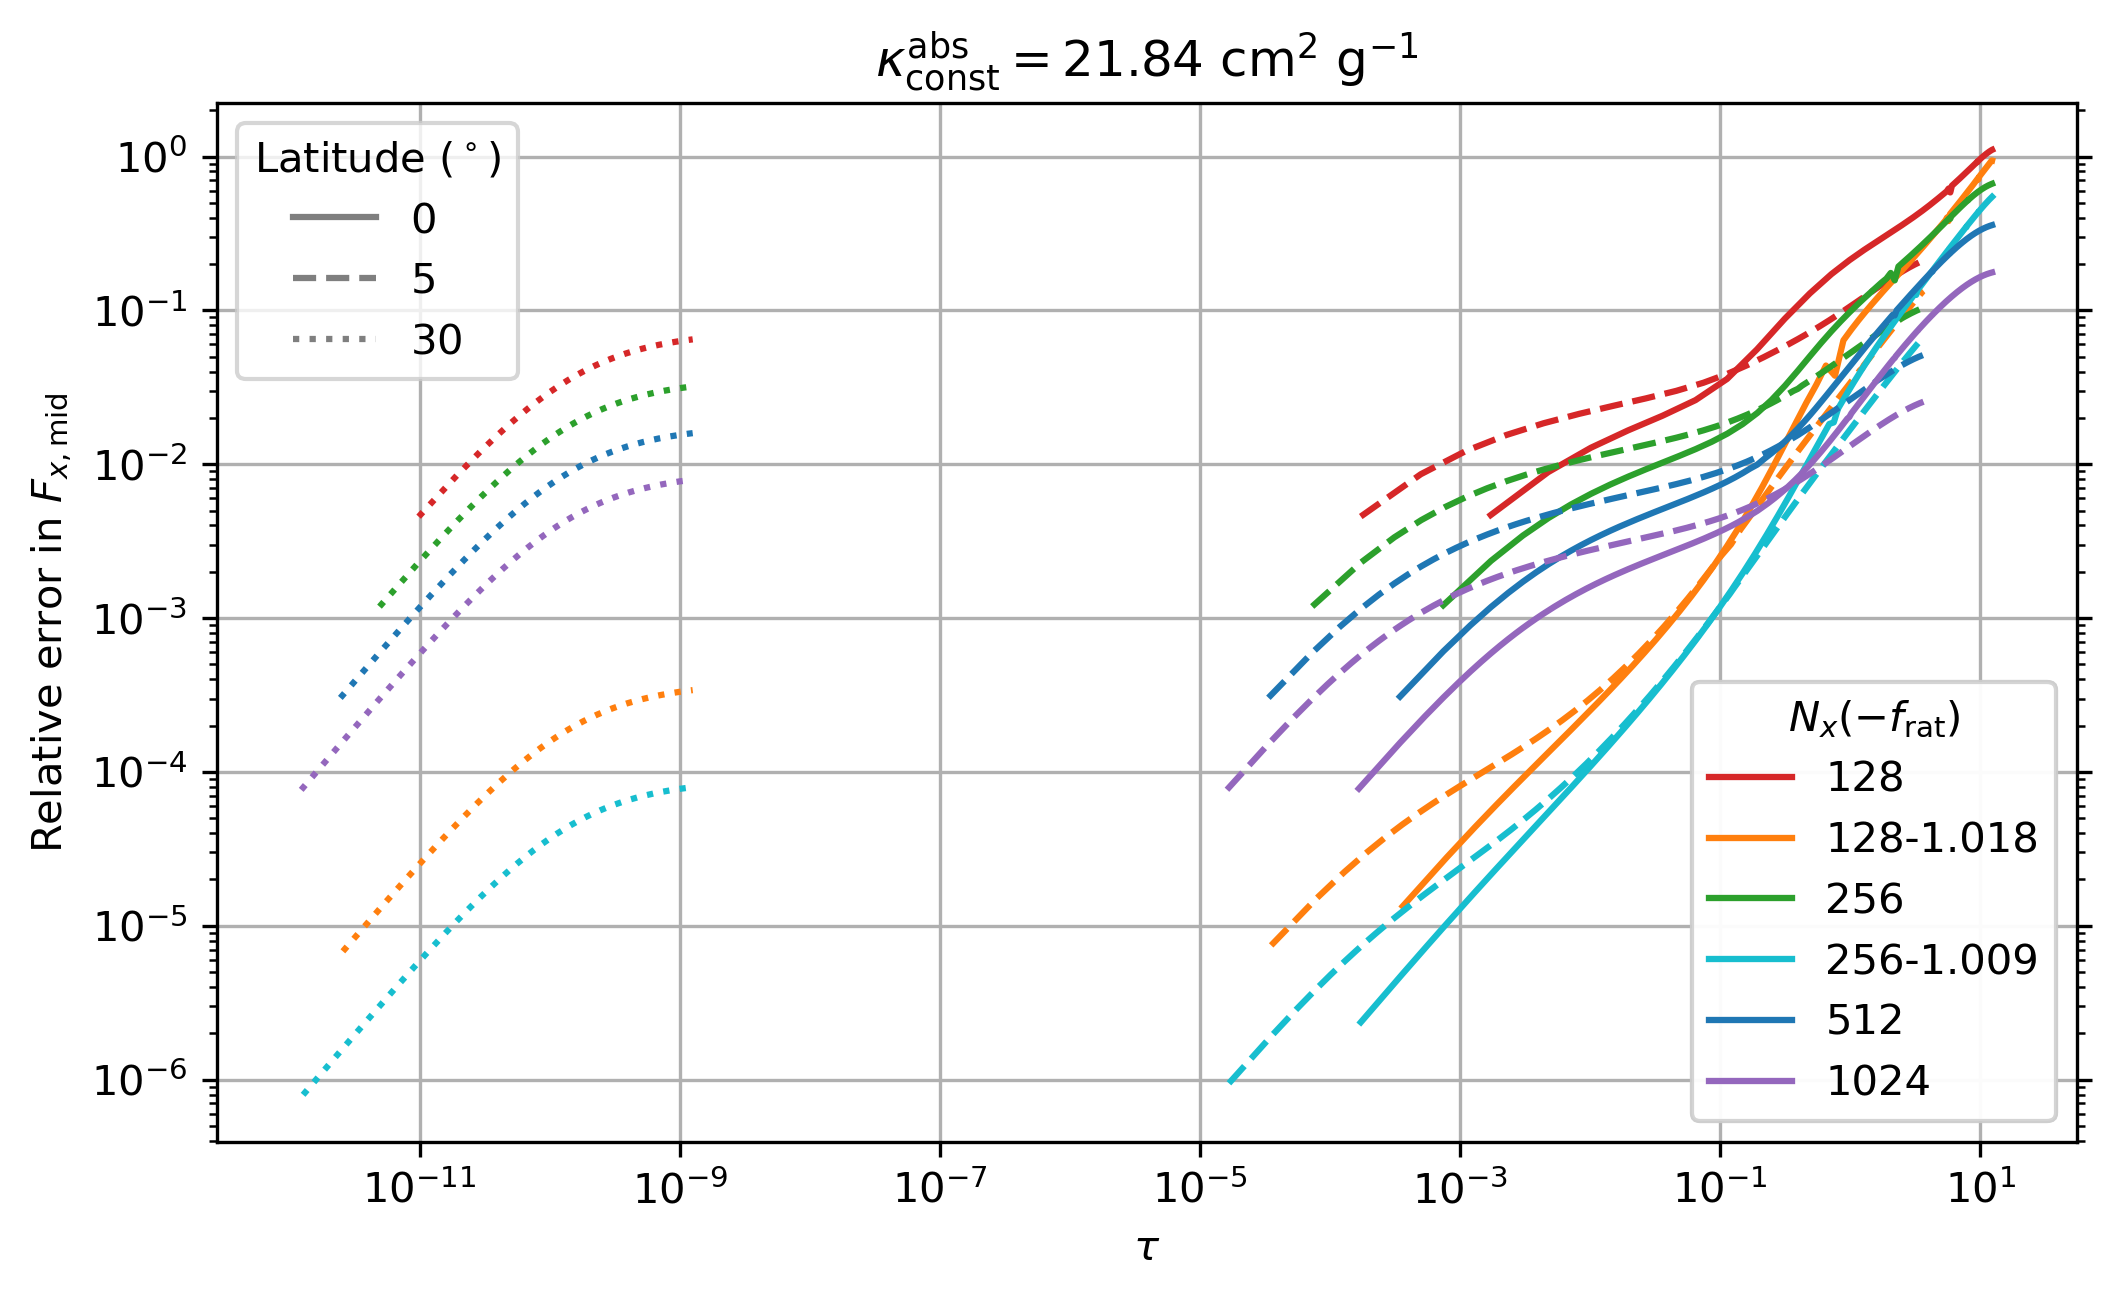

In [21]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Prepare plots
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=300)
tab_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:cyan', 'tab:blue',
              'tab:purple', 'tab:olive', 'tab:pink', 'tab:brown', 'tab:gray']
lss = ['solid', 'dashed', 'dotted']
theta_degs = [90, 85, 60]
c_solns, ls_thetas, ref_soln = [], [], []

# Compute and plot
problem_id = 'const_opac'
base = 'nx1'
runs = ['128', '128-1.018', '256', '256-1.009', '512', '1024']
for i, run in enumerate(runs):
  path = f'{base}/{run}'
  athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
  dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
           /athinput['mesh']['nx2']
  athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
  dtau = dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
  tau = np.cumsum(dtau, axis=1)
  Fx_theo = np.power(T, 4)*np.power(R/athdf['x1v'], 2)/4*(np.exp(-tau))
  Fx = np.zeros_like(Fx_theo)
  try:
    N_f = athinput['radiation']['n_frequency']
    for f in range(N_f):
      Fx += athdf[f'Fr_{f}_1'][0]
  except KeyError:
    Fx = athdf['Fr1'][0]
  c_solns.append(ax.plot([], [], tab_colors[i], label=f'{run}')[0])
  for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    rel_err = np.abs((Fx_theo[j, :] - Fx[j, :])/Fx_theo[j, :])
    ax.plot(tau[j, :], rel_err, color=tab_colors[i], ls=lss[th])
    if i == 0:
      ls_thetas.append(ax.plot([], [], color='tab:gray', ls=lss[th],
                       label=rf'${90-theta_deg}$')[0])

# Plot ghost points for colorless line style and add legends
ls_legend = plt.legend(title=r'Latitude ($^\circ)$', handles=ls_thetas,
                       loc='upper left')
color_legend = plt.legend(title=r'$N_x(-f_\mathrm{rat})$', handles=c_solns,
                          loc='lower right')
# soln_legend = plt.legend(handles=ref_soln, loc='lower center')
ax.add_artist(ls_legend)
ax.add_artist(color_legend)
# ax.add_artist(soln_legend)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xlabel=r'$\tau$', xscale='log', yscale='log',
       ylabel=r'Relative error in $F_{x, \mathrm{mid}}$',
       title=r'$\kappa_\mathrm{const}^\mathrm{abs}=21.84$ cm$^2$ g$^{-1}$')
ax.tick_params(axis='both', which='both', right=True)
# plt.savefig('filename.pdf', bbox_inches='tight', pad_inches=0.01)